In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
mnist_train = pd.read_csv("mnist_train.csv", header=None)
mnist_test = pd.read_csv("mnist_test.csv", header=None)

In [3]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train = mnist_train.drop([0], axis =1)
y_train = mnist_train[0]

X_test = mnist_test.drop([0], axis =1)
y_test = mnist_test[0]

In [5]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(np.real(cov))
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [6]:
X_analysis = range(1,101)

pca_acc = []

for i in X_analysis:
    pca = PCA(i)
    pca.fit(X_train.to_numpy())
    x_pca_train = pca.transform(X_train.to_numpy())
    x_pca_test = pca.transform(X_test.to_numpy())
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(x_pca_train, y_train)
    pred_neigh = neigh.predict(x_pca_test)
    save_Acc = accuracy_score(y_test, pred_neigh)
    pca_acc.append(save_Acc)

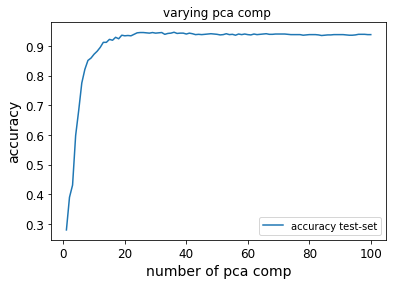

In [7]:
# plot
plt.plot(list(X_analysis), pca_acc, label = 'accuracy test-set')
plt.title("varying pca comp ")
plt.xlabel('number of pca comp')
plt.ylabel('accuracy')
plt.legend()
# plt.ylim([0.85, 1])
# plt.savefig("Adaboost_depth_1", dpi=300,  bbox_inches='tight')
plt.show()